# Scikit-Learn

<!--<badge>--><a href="https://colab.research.google.com/github/CodeLabBootcamp/Code-Lab-ML/blob/main/Week 2/1- Scikit Learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a><!--</badge>-->

[Scikit-learn](http://scikit-learn.org/stable/) is a python-based machine learning library providing implementations of a great many algorithms for supervised and unsupervised learning. In large part, it builds upon the cabilities of NumPy, SciPy, matplotlib, and Pandas.

In the context of supervised learning, the primary objects scikit-learn defines are called **estimators**. Each of these defines a `fit` method, which develops a model from provided training data, and a `predict` method, which uses the model to map a new instance to a suitable target value. Scikit-learn also defines multiple utilities for partitioning and manipulating data sets as well as evaluating models.

Below, we cover some of the basic steps needed to create a model in scikit-learn.  These notes are based on material appearing in the *scikit-learn tutorials*.

*  http://scikit-learn.org/stable/tutorial/index.html

## Datasets

Scikit-learn comes bundled with several pre-defined (typically small) `datasets` that users can explore.

    load_boston()	Load and return the boston house-prices dataset (regression).
    load_iris()	Load and return the iris dataset (classification).
    load_diabetes()	Load and return the diabetes dataset (regression).
    load_digits()	Load and return the digits dataset (classification).
    load_linnerud()	Load and return the linnerud dataset (multivariate regression).
    load_wine()	Load and return the wine dataset (classification).
    load_breast_cancer()	Load and return the breast cancer wisconsin dataset (classification).

The iris dataset is loaded below, and a description of it is printed.

In [ ]:
import numpy as np
import pandas as pd
# using 'from * import ...' allows as to import submodules directly
from sklearn import datasets, model_selection, linear_model , metrics,neighbors,tree,ensemble
# alternatively, we can import the whole package as such
import  sklearn 

In [ ]:
iris_dataset = datasets.load_iris() # sklearn.datasets.load_iris() works exactly the same

print(iris_dataset.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

We can also use `iris_dataset.data` and `iris_dataset.targets` to create or x & y (inputs & outputs) pairs that will be used for training and testing

In [ ]:
x = pd.DataFrame(iris_dataset.data, columns=iris_dataset.feature_names)
y = pd.DataFrame(iris_dataset.target, columns=['Labels'])

x

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


Alternatively, can  load a dataset into x & y directly (i.e. into input/output pairs) by setting the `return_X_y` parameter to `True`

In [ ]:
x,y = datasets.load_iris(return_X_y=True)

x.shape, y.shape

((150, 4), (150,))

## Train/Test Split

In order to validate that our model can generalize to data that it wasn't trained on, it's necessary to create a sperate **testing dataset** that will not be used in training.

Within the `model_selection` submodule of Scikit Learn, there's the `train_test_split` that we can use to automatically split the data into training and testing pairs.

Here's an explanation of the different parameters taken directly from the function's docstring

#### **Parameters**

***arrays** : sequence of indexables with same length / shape[0]
    Allowed inputs are lists, numpy arrays, scipy-sparse
    matrices or pandas dataframes.

**test_size** : float, int or None, optional (default=None)
    If float, should be between 0.0 and 1.0 and represent the proportion
    of the dataset to include in the test split. If int, represents the
    absolute number of test samples. If None, the value is set to the
    complement of the train size. If train_size is also None, it will
    be set to 0.25.

**train_size** : float, int, or None, (default=None)
    If float, should be between 0.0 and 1.0 and represent the
    proportion of the dataset to include in the train split. If
    int, represents the absolute number of train samples. If None,
    the value is automatically set to the complement of the test size.

**random_state** : int, RandomState instance or None, optional (default=None)
    If int, random_state is the seed used by the random number generator;
    If RandomState instance, random_state is the random number generator;
    If None, the random number generator is the RandomState instance used
    by np.random.

**shuffle** : boolean, optional (default=True)
    Whether or not to shuffle the data before splitting. If shuffle=False
    then stratify must be None.

**stratify** : array-like or None (default=None)
    If not None, data is split in a stratified fashion, using this as
    the class labels.






In [ ]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.1, random_state=42, stratify=y)

Please note that the `stratify` parameter works only in the context of classification tasks where there are a fixed amount of possible outputs/targets

## Linear Regression

In statistics, linear regression is a linear approach to modelling the relationship between a set a features, and a desired output. The case of one input feature is called simple linear regression; for more than one, the process is called multiple linear regression.

Scikit Learn defines this algorithm in `LinearRegression` class as a part of the `linear_models` module.


First, we load the data

In [ ]:
x,y = datasets.load_diabetes(return_X_y=True)

print("Diabetes features/input shape:", x.shape)
print("Diabetes target/output shape:", y.shape)

Diabetes features/input shape: (442, 10)
Diabetes target/output shape: (442,)


Second, we split the data into 90/10 training/testing split (90% of the data will be used for training while 10% will be used for testing)

In [ ]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.1, random_state=42)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((397, 10), (45, 10), (397,), (45,))

Third, we train (i.e. `fit`) the model using the training dataset (`x_train` as inputs, `y_train` as targets)

In [ ]:
regressor = linear_model.LinearRegression()
regressor.fit(x_train, y_train)

# we can preview the learned coefficients (i.e. weights) and intercept (i.e. bias)

print('Weights:\n', regressor.coef_)
print('Bias:\n', regressor.intercept_)

Weights:
 [  19.92576904 -262.55453086  509.19112446  336.09693678 -849.29530342
  480.22076125  120.68418641  236.71853501  716.61035542   70.41045019]
Bias:
 151.7227046642232


Fourth, we'll feed the test set into the trained model

In [ ]:
y_pred = regressor.predict(x_test)

Finally, we'll evaluate the predicted output against the ground-truth values in `y_test` using Scikit Learn's `metrics` module

One of the most used metrics to evaluate regression models is `mean_squared_error` which has the following formula: $$\frac{1}{n}\sum_{i=1}^{n}(\hat y_i - y_i)^2$$

Where `n` is the total number of examples evaluated (in this case 45), $\hat y$ is the predicted value (here `y_pred`) and $y$ is the ground-truth value (here `y_test`)


In [ ]:
metrics.mean_squared_error(y_test, y_pred)

2743.8800467688447

#KNN 
KNN is a non-parametric and lazy learning algorithm. Non-parametric means there is no assumption for underlying data distribution. In other words, the model structure determined from the dataset. This will be very helpful in practice where most of the real-world datasets do not follow mathematical theoretical assumptions.


Alternatively, can  load a dataset into x & y directly (i.e. into input/output pairs) by setting the `return_X_y` parameter to `True`

In [ ]:
x,y = datasets.load_iris(return_X_y=True)

x.shape, y.shape

((150, 4), (150,))

Second, we split the data into 90/10 training/testing split (90% of the data will be used for training while 10% will be used for testing)

In [ ]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.1, random_state=42, stratify=y)

In [ ]:
eigh =neighbors.KNeighborsClassifier(n_neighbors=3)
eigh.fit(x_train, y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [ ]:
y_pred=eigh.predict(x_test)
print(metrics.accuracy_score(y_test,y_pred))

1.0


#tree

## decision tree
###Decision Tree Algorithm
 
Decision Tree algorithm belongs to the family of supervised learning algorithms. Unlike other supervised learning algorithms, the decision tree algorithm can be used for solving regression and classification problems too.

The goal of using a Decision Tree is to create a training model that can use to predict the class or value of the target variable by learning simple decision rules inferred from prior data(training data).

In Decision Trees, for predicting a class label for a record we start from the root of the tree. We compare the values of the root attribute with the record’s attribute. On the basis of comparison, we follow the branch corresponding to that value and jump to the next node.

 

###Types of Decision Trees
 
Types of decision trees are based on the type of target variable we have. It can be of two types:

1-Categorical Variable Decision Tree: Decision Tree which has a categorical target variable then it called a Categorical variable decision tree.
2-Continuous Variable Decision Tree: Decision Tree has a continuous target variable then it is called Continuous Variable Decision Tree.

In [ ]:
x,y = datasets.load_iris(return_X_y=True)#import the dataset form sklearn

x.shape, y.shape

((150, 4), (150,))

Second, we split the data into 90/10 training/testing split (90% of the data will be used for training while 10% will be used for testing)

In [ ]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.1, random_state=42, stratify=y)

In [ ]:
clf = tree.DecisionTreeClassifier()
clf.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

[Text(248.0, 553.6666666666666, 'X[3] <= 0.8\ngini = 0.667\nsamples = 135\nvalue = [45, 45, 45]'),
 Text(186.0, 453.0, 'gini = 0.0\nsamples = 45\nvalue = [45, 0, 0]'),
 Text(310.0, 453.0, 'X[3] <= 1.65\ngini = 0.5\nsamples = 90\nvalue = [0, 45, 45]'),
 Text(124.0, 352.3333333333333, 'X[2] <= 4.95\ngini = 0.12\nsamples = 47\nvalue = [0, 44, 3]'),
 Text(62.0, 251.66666666666663, 'gini = 0.0\nsamples = 43\nvalue = [0, 43, 0]'),
 Text(186.0, 251.66666666666663, 'X[3] <= 1.55\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(124.0, 151.0, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(248.0, 151.0, 'X[0] <= 6.6\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(186.0, 50.33333333333326, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(310.0, 50.33333333333326, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(496.0, 352.3333333333333, 'X[2] <= 4.85\ngini = 0.045\nsamples = 43\nvalue = [0, 1, 42]'),
 Text(434.0, 251.66666666666663, 'X[1] <= 3.1\ngini = 0.375\nsamples = 4\

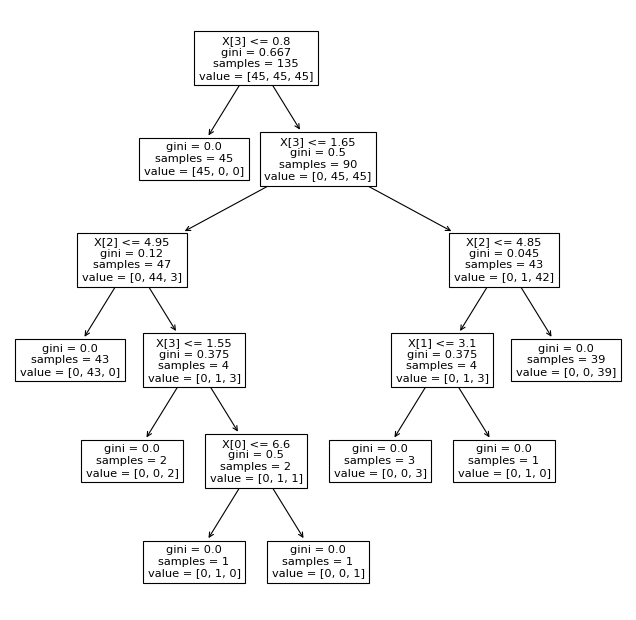

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10), dpi=80)
tree.plot_tree(clf)  

In [ ]:
y_pred=clf.predict(x_test)
print(metrics.accuracy_score(y_test,y_pred))

0.9333333333333333


## Logistic Regression

In statistics, the logistic model (or logit model) is used to model the probability of a certain class or event existing such as pass/fail, win/lose, alive/dead or healthy/sick. This can be extended to model several classes of events such as determining whether an image contains a cat, dog, lion, etc. Each object being detected in the image would be assigned a probability between 0 and 1, with a sum of one.


Scikit Learn defines this algorithm in `LogisticRegression` class as a part of the `linear_models` module.


First, we load the data

In [ ]:
x,y = datasets.load_breast_cancer(return_X_y=True)

print("Breast Cancer features/input shape:", x.shape)
print("Breast Cancer target/output shape:", y.shape)

Breast Cancer features/input shape: (569, 30)
Breast Cancer target/output shape: (569,)


Second, we split the data into 90/10 training/testing split (90% of the data will be used for training while 10% will be used for testing)

Since this is a classification problem (we only have two possible outputs, 1 or 0), we can use the `stratify` parameter to ensure that the two possible output values are distributed proportionally between the training and testing sets and preserve the data's original distribution across the two sets.

In [ ]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.1, random_state=42, stratify=y)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((512, 30), (57, 30), (512,), (57,))

Third, we train (i.e. `fit`) the model using the training dataset (`x_train` as inputs, `y_train` as targets)

In [ ]:
classifier = linear_model.LogisticRegression()
classifier.fit(x_train, y_train)

# we can preview the learned coefficients (i.e. weights) and intercept (i.e. bias)

print('Weights:\n', regressor.coef_)
print('Bias:\n', regressor.intercept_)

Weights:
 [  19.92576904 -262.55453086  509.19112446  336.09693678 -849.29530342
  480.22076125  120.68418641  236.71853501  716.61035542   70.41045019]
Bias:
 151.7227046642232


/Users/sabri/Projects/Python/Code Lab/venv/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fourth, we'll feed the test set into the trained model

In [ ]:
y_pred = classifier.predict(x_test)

Finally, we'll evaluate the predicted output against the ground-truth values in `y_test` using Scikit Learn's `metrics` module

One of the most used metrics to evaluate classification models is `accuracy_score` which calculates the precentage of the examples that the trained classifier guessed correctly


In [ ]:
metrics.accuracy_score(y_test, y_pred)

0.9298245614035088

Here the accuracy score corresponds to 94.7%